Eileen Zhang 2020/08/03

In [1]:
import numpy as np
import os
import time

#os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

# cifar10 查看

In [2]:
from tensorflow import keras
from keras.datasets import cifar10

In [3]:
(x_train, y_train_cats), (x_test, y_test_cats) = cifar10.load_data()

In [4]:
x_train = x_train/255.
x_test = x_test/255.

In [5]:
type(x_train),x_train.shape

(numpy.ndarray, (50000, 32, 32, 3))

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

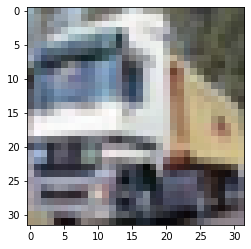

In [7]:
plt.imshow(x_train[1])

0 airplane 										
1 automobile 										
2 bird 										
3 cat 										
4 deer 										
5 dog 										
6 frog 										
7 horse 										
8 ship 										
9 truck

In [8]:
def mlp(units, dropout = 0.2,output_layer=True):
    layers = []
    if(output_layer):
        last = units[-1]
        units = units[:-1]
    for u in units:
        layers.append(keras.layers.BatchNormalization())
        layers.append(keras.layers.Dense(u, activation='relu'))
        layers.append(keras.layers.Dropout(dropout))
    if(output_layer):
        layers.append(keras.layers.Dense(last, activation=keras.activations.softmax))
    return layers

In [9]:
import tensorflow as tf

# CSPNet

总结: 和论文结果相似,和DenseNet比 10 epochs 时间从43min 52s减少到36min 36s,准确度从0.7402降到0.6072

In [46]:
import tensorflow.keras.backend as K

In [64]:
inputs = keras.Input([32, 32,3])
x = keras.layers.Conv2D(4, 1, padding="same",input_shape = [32, 32,3], activation='relu')(inputs)
x_0, x_1 = keras.layers.Lambda(tf.split,arguments={'axis': -1 ,'num_or_size_splits': 2})(x)
x_1 = keras.layers.MaxPooling2D(2)(x_1)
x_1 = keras.layers.UpSampling2D(2)(x_1)
x_1 = keras.layers.Conv2D(32, 2, padding="same", activation='relu')(x_1)
x3 = keras.layers.concatenate([x_0,x_1])
x3 = keras.layers.Flatten()(x3)
x3 = keras.models.Sequential(mlp([300,20,10]))(x3)

model7 = keras.models.Model(inputs = inputs, outputs = x3)

In [66]:
model7(np.expand_dims(x_train[0],0))

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[0.14631383, 0.1049647 , 0.06174551, 0.00943752, 0.17349598,
        0.03094272, 0.04070346, 0.05189689, 0.292652  , 0.08784745]],
      dtype=float32)>

In [67]:
model7.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_18 (InputLayer)           [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_29 (Conv2D)              (None, 32, 32, 4)    16          input_18[0][0]                   
__________________________________________________________________________________________________
lambda_8 (Lambda)               [(None, 32, 32, 2),  0           conv2d_29[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_7 (MaxPooling2D)  (None, 16, 16, 2)    0           lambda_8[0][1]                   
____________________________________________________________________________________________

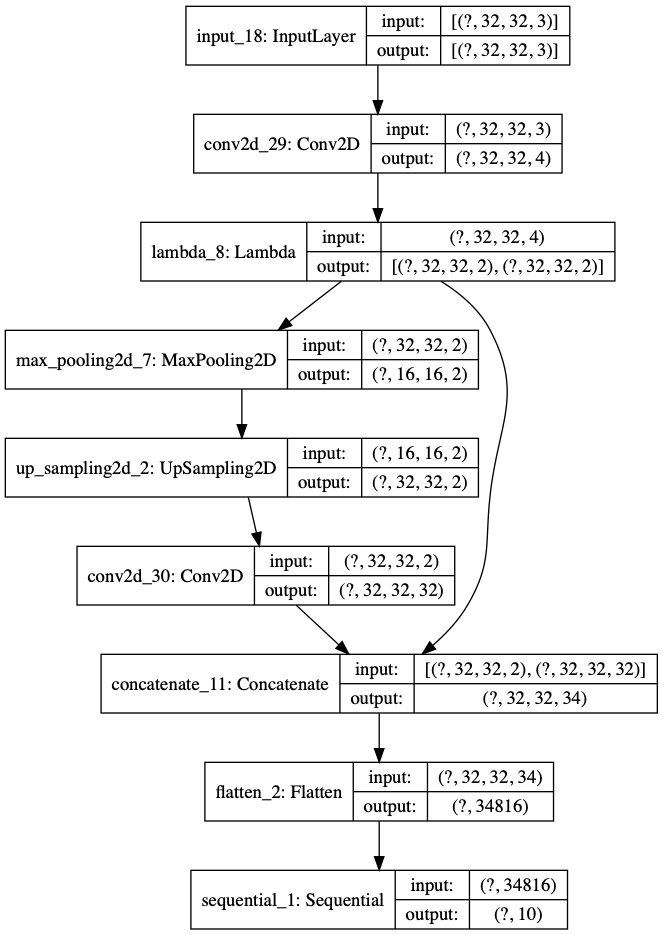

In [68]:
from keras.utils import plot_model
plot_model(model7,to_file="model.png",show_shapes=True)

In [69]:
model7.compile(optimizer= 'adam', loss= 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [70]:
%%time
model7.fit(x_train, y_train_cats, epochs= 10)

Epoch 1/10
1563/1563 [==============================] - 246s 158ms/step - loss: 1.8598 - accuracy: 0.3246
Epoch 2/10
1563/1563 [==============================] - 239s 153ms/step - loss: 1.5886 - accuracy: 0.4235
Epoch 3/10
1563/1563 [==============================] - 235s 150ms/step - loss: 1.4474 - accuracy: 0.4788
Epoch 4/10
1563/1563 [==============================] - 227s 145ms/step - loss: 1.3751 - accuracy: 0.5058
Epoch 5/10
1563/1563 [==============================] - 210s 134ms/step - loss: 1.3080 - accuracy: 0.5310
Epoch 6/10
1563/1563 [==============================] - 209s 134ms/step - loss: 1.2547 - accuracy: 0.5519
Epoch 7/10
1563/1563 [==============================] - 211s 135ms/step - loss: 1.2119 - accuracy: 0.5675
Epoch 8/10
1563/1563 [==============================] - 214s 137ms/step - loss: 1.1650 - accuracy: 0.5812
Epoch 9/10
1563/1563 [==============================] - 199s 128ms/step - loss: 1.1464 - accuracy: 0.5887
Epoch 10/10
1563/1563 [=======================

# Inception model

In [124]:
inputs = keras.Input([32, 32,3])
x = keras.layers.Conv2D(3, 1, padding="same",input_shape = [32, 32,3], activation='relu')(inputs)
x_0, x_1, x_2 = keras.layers.Lambda(tf.split,arguments={'axis': -1 ,'num_or_size_splits': 3})(x)

x_3 = keras.layers.MaxPooling2D(2)(x)
x_3 = keras.layers.UpSampling2D(2)(x_3)
x_3 = keras.layers.Conv2D(32, 1, padding="same", activation='relu')(x_3)

x_0 = keras.layers.Conv2D(32, 3, padding="same", activation='relu')(x_0)
x_0 = keras.layers.Conv2D(32, 3, padding="same", activation='relu')(x_0)

x_1 = keras.layers.Conv2D(32, 3, padding="same", activation='relu')(x_1)

x_2 = keras.layers.Conv2D(32, 1, padding="same", activation='relu')(x_2)

x1 = keras.layers.concatenate([x_0,x_1,x_2,x_3])
x1 = keras.layers.Flatten()(x1)
x1 = keras.models.Sequential(mlp([300,20,10]))(x1)

model8 = keras.models.Model(inputs = inputs, outputs = x1)

In [125]:
model8.summary()

Model: "model_22"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_39 (InputLayer)           [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_32 (Conv2D)              (None, 32, 32, 3)    12          input_39[0][0]                   
__________________________________________________________________________________________________
lambda_9 (Lambda)               [(None, 32, 32, 1),  0           conv2d_32[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_8 (MaxPooling2D)  (None, 16, 16, 3)    0           conv2d_32[0][0]                  
___________________________________________________________________________________________

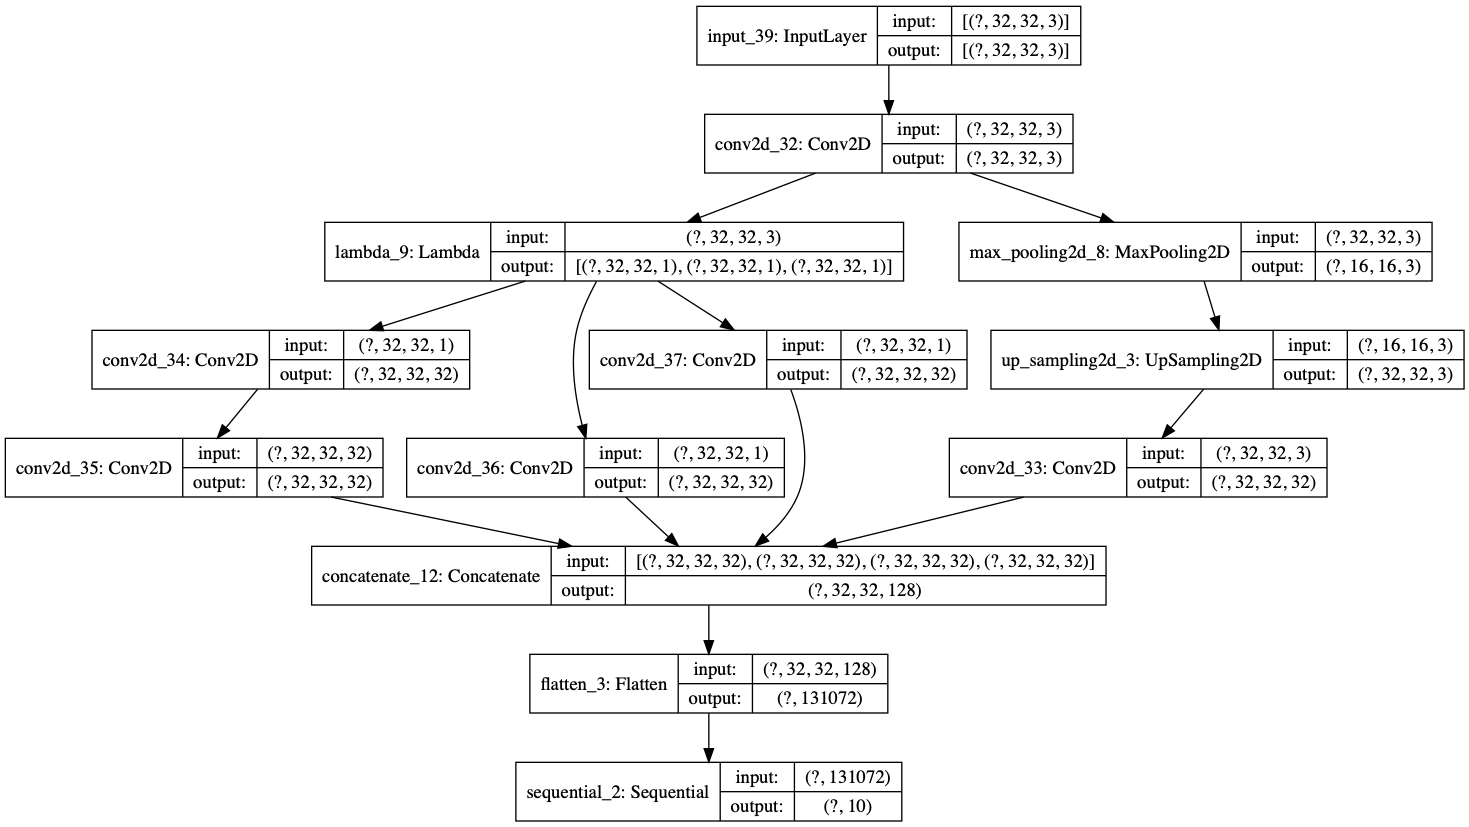

In [126]:
plot_model(model8,to_file="model8.png",show_shapes=True)

In [130]:
model8.compile(optimizer= 'adam', loss= 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [131]:
%%time
model8.fit(x_train, y_train_cats, epochs= 10)

Epoch 1/10
1563/1563 [==============================] - 750s 480ms/step - loss: 1.8248 - accuracy: 0.3506
Epoch 2/10
1563/1563 [==============================] - 761s 487ms/step - loss: 1.3482 - accuracy: 0.5192
Epoch 3/10
1563/1563 [==============================] - 744s 476ms/step - loss: 1.1593 - accuracy: 0.5950
Epoch 4/10
1563/1563 [==============================] - 740s 473ms/step - loss: 1.0262 - accuracy: 0.6439
Epoch 5/10
1563/1563 [==============================] - 764s 489ms/step - loss: 0.9466 - accuracy: 0.6696
Epoch 6/10
1563/1563 [==============================] - 737s 471ms/step - loss: 0.8669 - accuracy: 0.6997
Epoch 7/10
1563/1563 [==============================] - 737s 472ms/step - loss: 0.8171 - accuracy: 0.7164
Epoch 8/10
1563/1563 [==============================] - 735s 470ms/step - loss: 0.7948 - accuracy: 0.7257
Epoch 9/10
1563/1563 [==============================] - 737s 472ms/step - loss: 0.6780 - accuracy: 0.7639
Epoch 10/10
1563/1563 [=======================